# Load database or fetch it from URL

In [2]:
import pandas as pd

try:
    data = pd.read_csv('./data/interrupcion-legal-del-embarazo.csv')
except FileNotFoundError:
    url = "https://datos.cdmx.gob.mx/explore/dataset/interrupcion-legal-del-embarazo/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C"
    data = pd.read_csv(url)
    data.to_csv('./data/interrupcion-legal-del-embarazo.csv')


### Number of rows and columns

In [3]:
len(data)

62003

In [4]:
len(data.columns)

37

### Lowercase column names

In [5]:
data.columns = data.columns.str.lower()
data.dtypes

unnamed: 0                int64
año                       int64
mes                      object
cve_hospital              int64
fingreso                 object
autoref                  object
edocivil_descripcion     object
edad                      int64
desc_derechohab          object
nivel_edu                object
ocupacion                object
religion                 object
parentesco               object
entidad                  object
alc o municipio          object
menarca                 float64
fsexual                 float64
fmenstrua                object
sememb                  float64
nhijos                  float64
gesta                   float64
naborto                 float64
npartos                 float64
ncesarea                float64
nile                    float64
consejeria               object
anticonceptivo           object
c_num                   float64
motiles                  object
h_fingreso               object
desc_servicio            object
p_semges

### Exclude unused variables

In [6]:
excluded = [
    'unnamed: 0', 'año', 'mes', 'desc_derechohab', 'cve_hospital', 'fingreso', 'autoref', 
    'parentesco', 'entidad', 'alc o municipio', 'c_num', 'h_fingreso', 'desc_servicio',
    'p_semgest', 'p_consent', 'procile', 's_complica', 'panticoncep', 'fmenstrua', 'p_diasgesta'
]
filtered_data = data[data.columns.difference(excluded)]
filtered_data.dtypes

anticonceptivo           object
consejeria               object
edad                      int64
edocivil_descripcion     object
fsexual                 float64
gesta                   float64
menarca                 float64
motiles                  object
naborto                 float64
ncesarea                float64
nhijos                  float64
nile                    float64
nivel_edu                object
npartos                 float64
ocupacion                object
religion                 object
sememb                  float64
dtype: object

In [7]:
len(filtered_data.columns)

17

## Categorical variables encoding example

In [8]:
filtered_data["anticonceptivo_cat"] = filtered_data.anticonceptivo.astype("category")
filtered_data.anticonceptivo_cat.value_counts()

Ninguno                                32594
Condón                                 15405
DIU                                     2031
Barrera                                 1361
Anticoncepcion de Emergencia            1270
Inyección                               1114
Parche Dérmico                           578
Implante Subdérmico                      374
Pastillas Anticonceptivas                312
Hormonal Oral                            115
Vasectomía                                41
Hormonal Inyectable                       33
Condón y Otro                             17
Anticoncepcion de Emergencia y Otro       17
Anillo Vaginal                            11
Calendario                                 7
Salpingoclacia                             5
Coito interrumpido                         5
Medicamento                                4
Ritmo                                      3
Name: anticonceptivo_cat, dtype: int64

In [9]:
filtered_data["anticonceptivo_code"] = filtered_data.anticonceptivo_cat.cat.codes
filtered_data.anticonceptivo_code.value_counts()

 14    32594
 6     15405
-1      6706
 8      2031
 3      1361
 1      1270
 12     1114
 15      578
 11      374
 16      312
 10      115
 19       41
 9        33
 7        17
 2        17
 0        11
 4         7
 5         5
 18        5
 13        4
 17        3
Name: anticonceptivo_code, dtype: int64

## Encode all columns with type object

In [10]:
columns_to_encode = ["anticonceptivo", "consejeria", "edocivil_descripcion", "motiles", "nivel_edu", "ocupacion", "religion"]
c_filtered_data = filtered_data[columns_to_encode]
c_filtered_data.dtypes

anticonceptivo          object
consejeria              object
edocivil_descripcion    object
motiles                 object
nivel_edu               object
ocupacion               object
religion                object
dtype: object

In [11]:
for column in c_filtered_data:
    cat_name = column + "_cat"
    code_name = column + "_code"
    c_filtered_data[cat_name] = c_filtered_data[column].astype("category")
    c_filtered_data[code_name] = c_filtered_data[cat_name].cat.codes

c_filtered_data.dtypes

anticonceptivo                 object
consejeria                     object
edocivil_descripcion           object
motiles                        object
nivel_edu                      object
ocupacion                      object
religion                       object
anticonceptivo_cat           category
anticonceptivo_code              int8
consejeria_cat               category
consejeria_code                  int8
edocivil_descripcion_cat     category
edocivil_descripcion_code        int8
motiles_cat                  category
motiles_code                     int8
nivel_edu_cat                category
nivel_edu_code                   int8
ocupacion_cat                category
ocupacion_code                   int8
religion_cat                 category
religion_code                    int8
dtype: object

## Remove original columns in the data copy

In [12]:
c_filtered_data = c_filtered_data[c_filtered_data.columns.difference(columns_to_encode)]
c_filtered_data.dtypes

anticonceptivo_cat           category
anticonceptivo_code              int8
consejeria_cat               category
consejeria_code                  int8
edocivil_descripcion_cat     category
edocivil_descripcion_code        int8
motiles_cat                  category
motiles_code                     int8
nivel_edu_cat                category
nivel_edu_code                   int8
ocupacion_cat                category
ocupacion_code                   int8
religion_cat                 category
religion_code                    int8
dtype: object

## Join both dataframes into a new one

In [13]:
encoded_data = pd.concat([filtered_data, c_filtered_data])
encoded_data.dtypes

anticonceptivo                 object
consejeria                     object
edad                          float64
edocivil_descripcion           object
fsexual                       float64
gesta                         float64
menarca                       float64
motiles                        object
naborto                       float64
ncesarea                      float64
nhijos                        float64
nile                          float64
nivel_edu                      object
npartos                       float64
ocupacion                      object
religion                       object
sememb                        float64
anticonceptivo_cat           category
anticonceptivo_code              int8
consejeria_cat                 object
consejeria_code               float64
edocivil_descripcion_cat       object
edocivil_descripcion_code     float64
motiles_cat                    object
motiles_code                  float64
nivel_edu_cat                  object
nivel_edu_co

# Sample descriptive stats

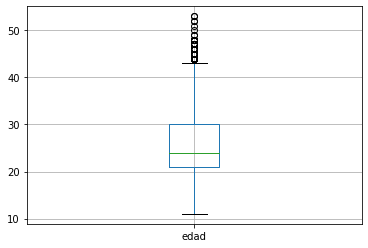

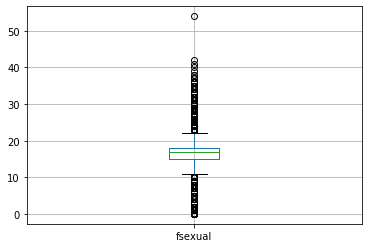

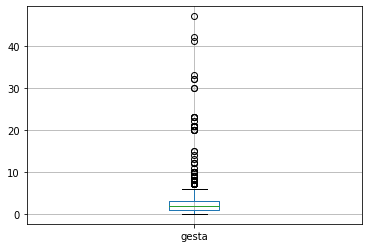

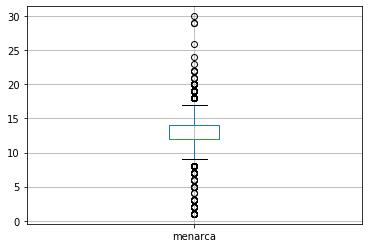

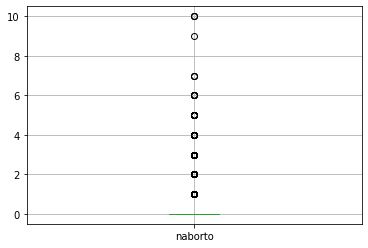

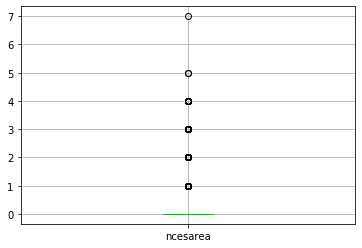

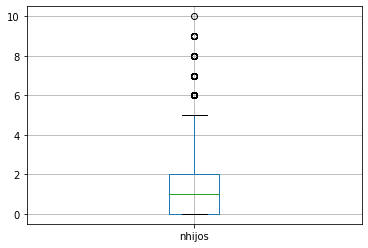

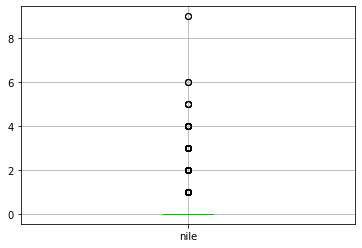

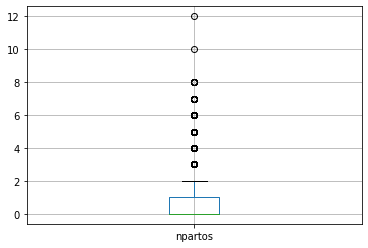

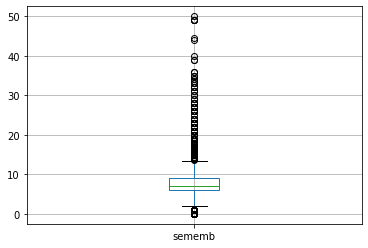

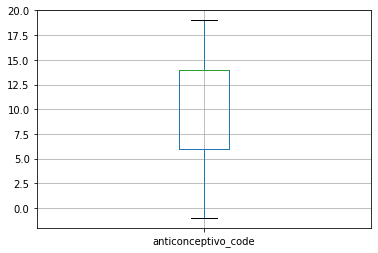

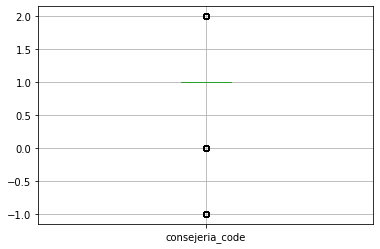

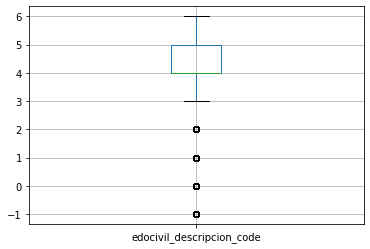

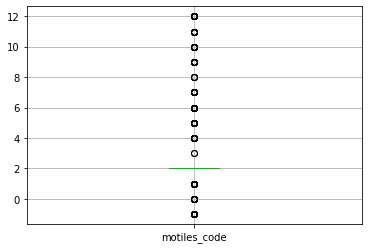

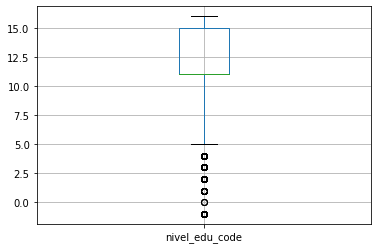

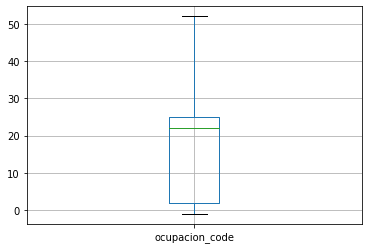

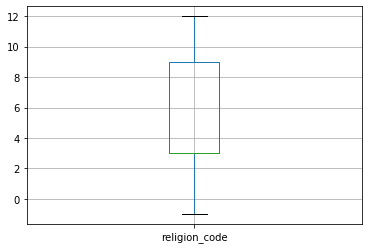

In [33]:
import matplotlib.pyplot as plt
import numpy

for column in encoded_data.select_dtypes(include=[numpy.number]):
    plt.figure()
    encoded_data.boxplot([column])